**Section 1: Conceptual Questions**






1. Multiple Choice Questions (MCQs)
The correct answer is B) K-Means Clustering, which is an unsupervised learning algorithm. The other options (Decision Tree, Support Vector Machine, and Random Forest) are all supervised learning algorithms.

2. What is the difference between overfitting and underfitting?
Overfitting occurs when a model learns the training data too well, capturing noise and random fluctuations rather than just the underlying pattern. The model becomes too complex and performs excellently on training data but poorly on new, unseen data.
Example: A decision tree that perfectly classifies every single customer in your historical dataset by creating many specific branches, but fails when given new customers because it learned peculiarities of the training data rather than generalizable patterns.
Underfitting happens when a model is too simple to capture the underlying pattern in the data. It performs poorly on both training and test data.
Example: Using a linear regression model to predict housing prices while only considering square footage, when the relationship is actually complex and depends on many other factors like location, age of property, amenities, etc.

3. How Gradient Descent works
Gradient Descent is an optimization algorithm used to minimize the cost function by iteratively moving toward the steepest descent as defined by the negative of the gradient.
Process:

Start with random parameter values
Calculate the gradient (slope) of the cost function with respect to each parameter
Update each parameter by moving in the opposite direction of the gradient
Repeat until convergence (minimal change in cost function)

Learning rate impact: Controls how big of a step we take in each iteration.

Too high: May overshoot the minimum and fail to converge
Too low: Takes too long to converge and may get stuck in local minima

Cost function impact: Defines the optimization landscape.

Different cost functions create different optimization landscapes
The shape of the cost function determines how easy it is to find the global minimum
Some cost functions are convex (one global minimum), while others have multiple local minima

4. Role of activation functions in neural networks
Activation functions introduce non-linearity into neural networks, allowing them to learn complex patterns and relationships that wouldn't be possible with just linear transformations.
Two common activation functions:

ReLU (Rectified Linear Unit)

Properties: f(x) = max(0, x)
Advantages: Computationally efficient, helps with vanishing gradient problem
Used in hidden layers of deep networks


Sigmoid

Properties: f(x) = 1/(1+e^(-x)), outputs between 0 and 1
Advantages: Good for binary classification (output layer)
Disadvantages: Suffers from vanishing gradient problem in deep networks

5. Preprocessing a dataset with categorical and numerical features
For a dataset with both categorical and numerical features:
For categorical features:

Encoding: Convert to numerical representation using:

One-hot encoding for nominal categories (no intrinsic order)
Label or ordinal encoding for ordinal categories (have a natural order)


Handle missing values: Fill with mode or create a "missing" category

For numerical features:

Scaling: Normalize or standardize to bring features to similar scales

Min-max scaling to [0,1] range
Standardization (z-score) to mean=0, std=1


Handle missing values: Impute with mean, median, or use more advanced techniques
Handle outliers: Cap, remove, or transform extreme values

Additional steps:

Feature selection to remove irrelevant features
Feature engineering to create new, more informative features
Dimensionality reduction if needed (PCA, t-SNE)

**Section 2: Python Coding Questions**

6. Simple Linear Regression Model

Model intercept: 32324.466223311152
Model coefficient: 7175.358767938397
Predicted salary for 5 years of experience: $68201.26


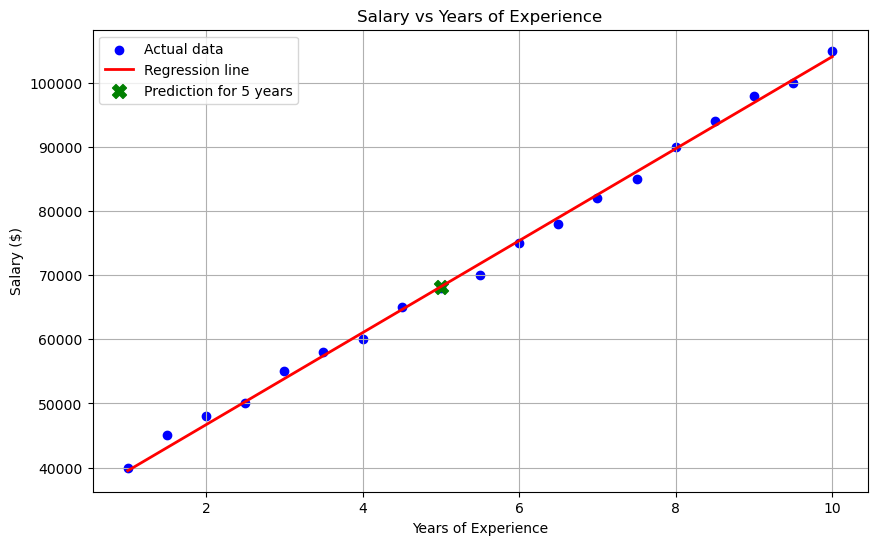

Mean Squared Error: 1288320.06
R² Score: 0.99


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


years_experience = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10])
salary = np.array([40000, 45000, 48000, 50000, 55000, 58000, 60000, 65000, 68000, 70000, 75000, 78000, 82000, 85000, 90000, 94000, 98000, 100000, 105000])


X = years_experience.reshape(-1, 1)
y = salary


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)


print(f"Model intercept: {model.intercept_}")
print(f"Model coefficient: {model.coef_[0]}")


years_to_predict = np.array([[5]])
predicted_salary = model.predict(years_to_predict)
print(f"Predicted salary for 5 years of experience: ${predicted_salary[0]:.2f}")


plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression line')
plt.scatter(years_to_predict, predicted_salary, color='green', s=100, marker='X', label='Prediction for 5 years')
plt.xlabel('Years of Experience')
plt.ylabel('Salary ($)')
plt.title('Salary vs Years of Experience')
plt.legend()
plt.grid(True)
plt.show()


from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

7. K-Means Clustering on Iris Dataset

C:\Users\kizi9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kizi9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kizi9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kizi9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

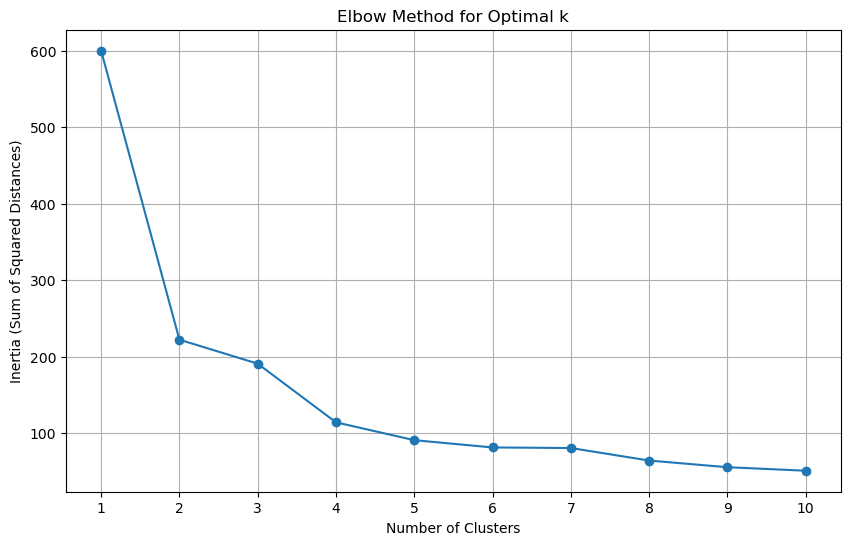

C:\Users\kizi9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


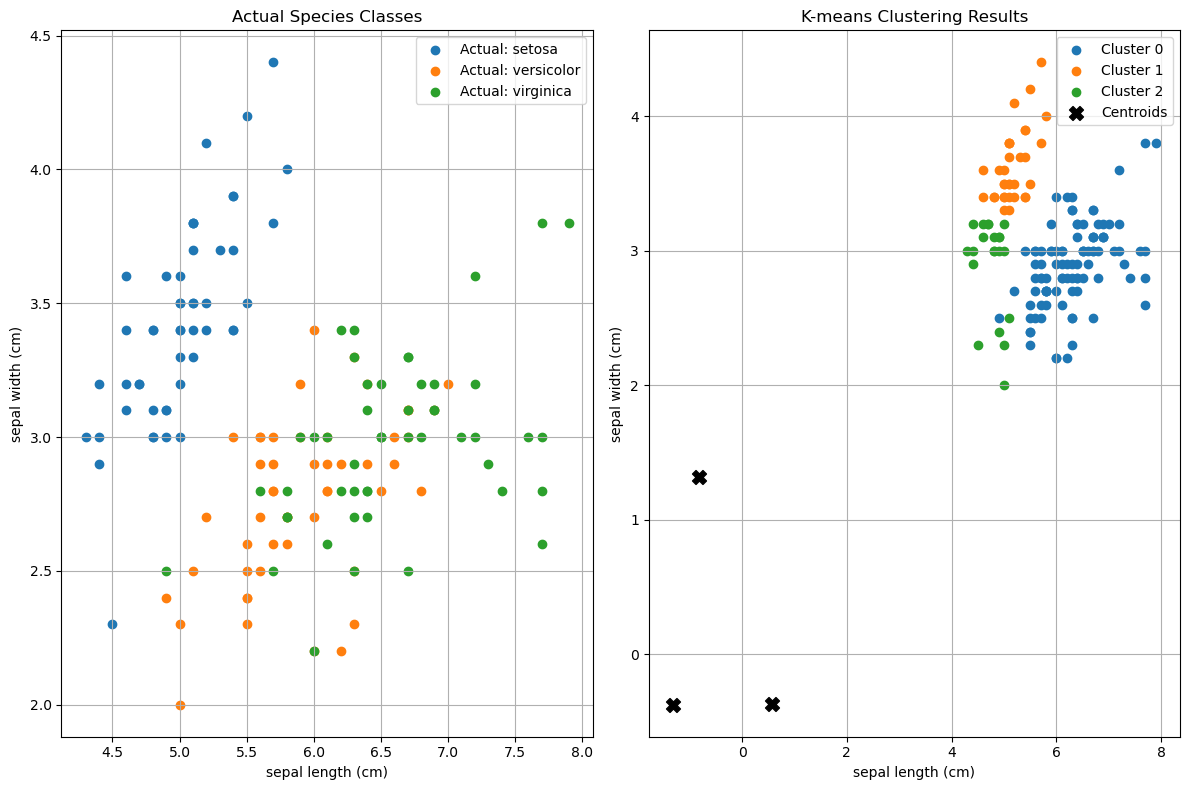

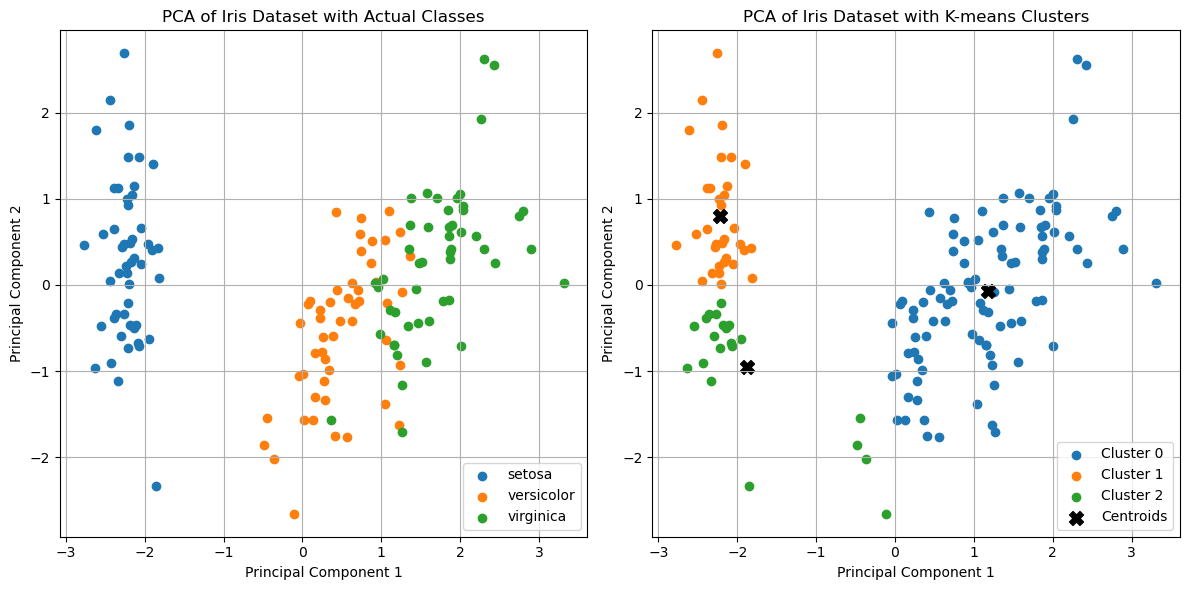

Clustering evaluation:
Adjusted Rand Index: 0.432804702527474

Cluster vs Actual Species:
Cluster          0   1   2
Actual Species            
setosa           0  33  17
versicolor      46   0   4
virginica       50   0   0


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler


iris = load_iris()
X = iris.data
feature_names = iris.feature_names
target = iris.target
target_names = iris.target_names


iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['target'] = target
iris_df['target_name'] = [target_names[i] for i in target]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()


k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)


iris_df['cluster'] = kmeans.labels_


plt.figure(figsize=(12, 8))


plt.subplot(1, 2, 1)
for i, species in enumerate(np.unique(target)):
    plt.scatter(X[target == species, 0], X[target == species, 1], 
                label=f"Actual: {target_names[species]}")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Actual Species Classes')
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
for i in range(k):
    plt.scatter(X[kmeans.labels_ == i, 0], X[kmeans.labels_ == i, 1], 
                label=f"Cluster {i}")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker='X', color='black', s=100, label='Centroids')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('K-means Clustering Results')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
for i, species in enumerate(np.unique(target)):
    plt.scatter(X_pca[target == species, 0], X_pca[target == species, 1], 
                label=f"{target_names[species]}")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset with Actual Classes')
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
for i in range(k):
    plt.scatter(X_pca[kmeans.labels_ == i, 0], X_pca[kmeans.labels_ == i, 1], 
                label=f"Cluster {i}")

centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
            marker='X', color='black', s=100, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset with K-means Clusters')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


from sklearn.metrics import adjusted_rand_score

print("Clustering evaluation:")
print(f"Adjusted Rand Index: {adjusted_rand_score(target, kmeans.labels_)}")


cluster_comparison = pd.crosstab(
    index=iris_df['target_name'],
    columns=iris_df['cluster'],
    rownames=['Actual Species'],
    colnames=['Cluster']
)
print("\nCluster vs Actual Species:")
print(cluster_comparison)

8. Decision Tree Classification on Breast Cancer Dataset

Class distribution:
target
1    357
0    212
Name: count, dtype: int64
Benign (class 1): 357
Malignant (class 0): 212

Model Accuracy: 0.9181

Classification Report:
              precision    recall  f1-score   support

   malignant       0.89      0.89      0.89        64
      benign       0.93      0.93      0.93       107

    accuracy                           0.92       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171


Confusion Matrix:
[[ 57   7]
 [  7 100]]


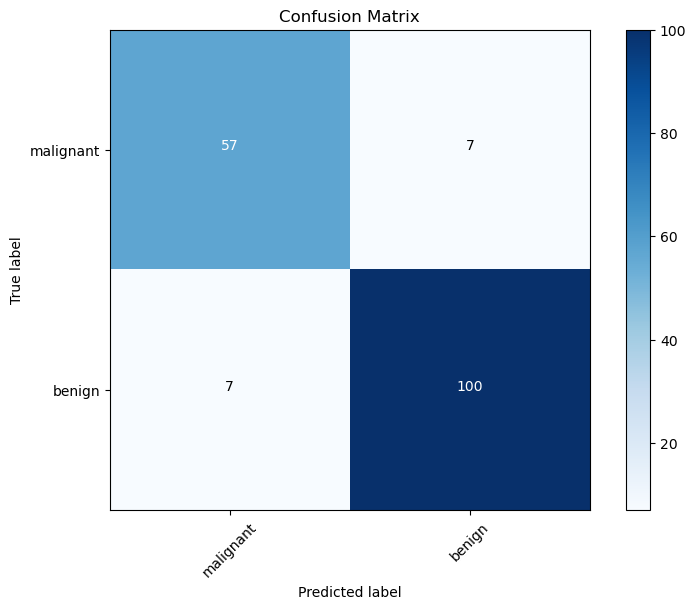


Feature ranking:
1. worst radius (0.7215)
2. worst concave points (0.1288)
3. worst texture (0.0592)
4. texture error (0.0301)
5. worst concavity (0.0186)
6. mean fractal dimension (0.0102)
7. compactness error (0.0100)
8. worst smoothness (0.0087)
9. worst fractal dimension (0.0072)
10. smoothness error (0.0033)


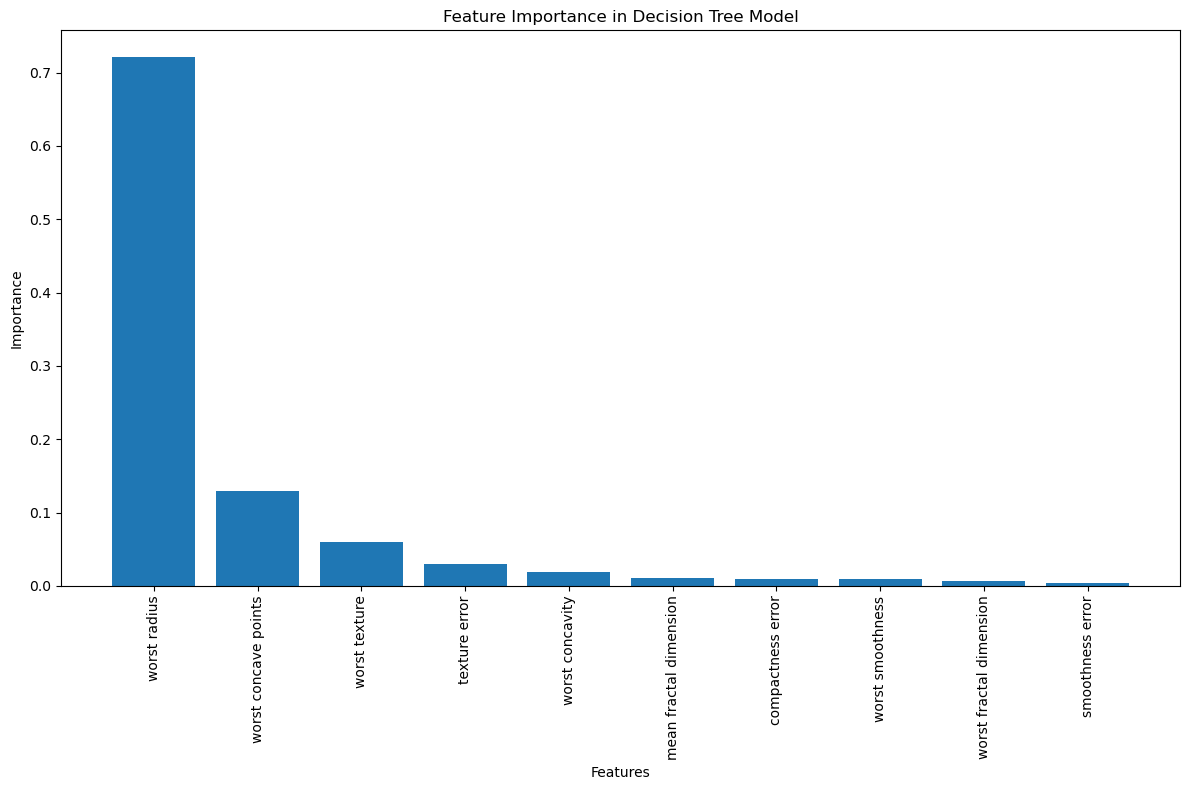

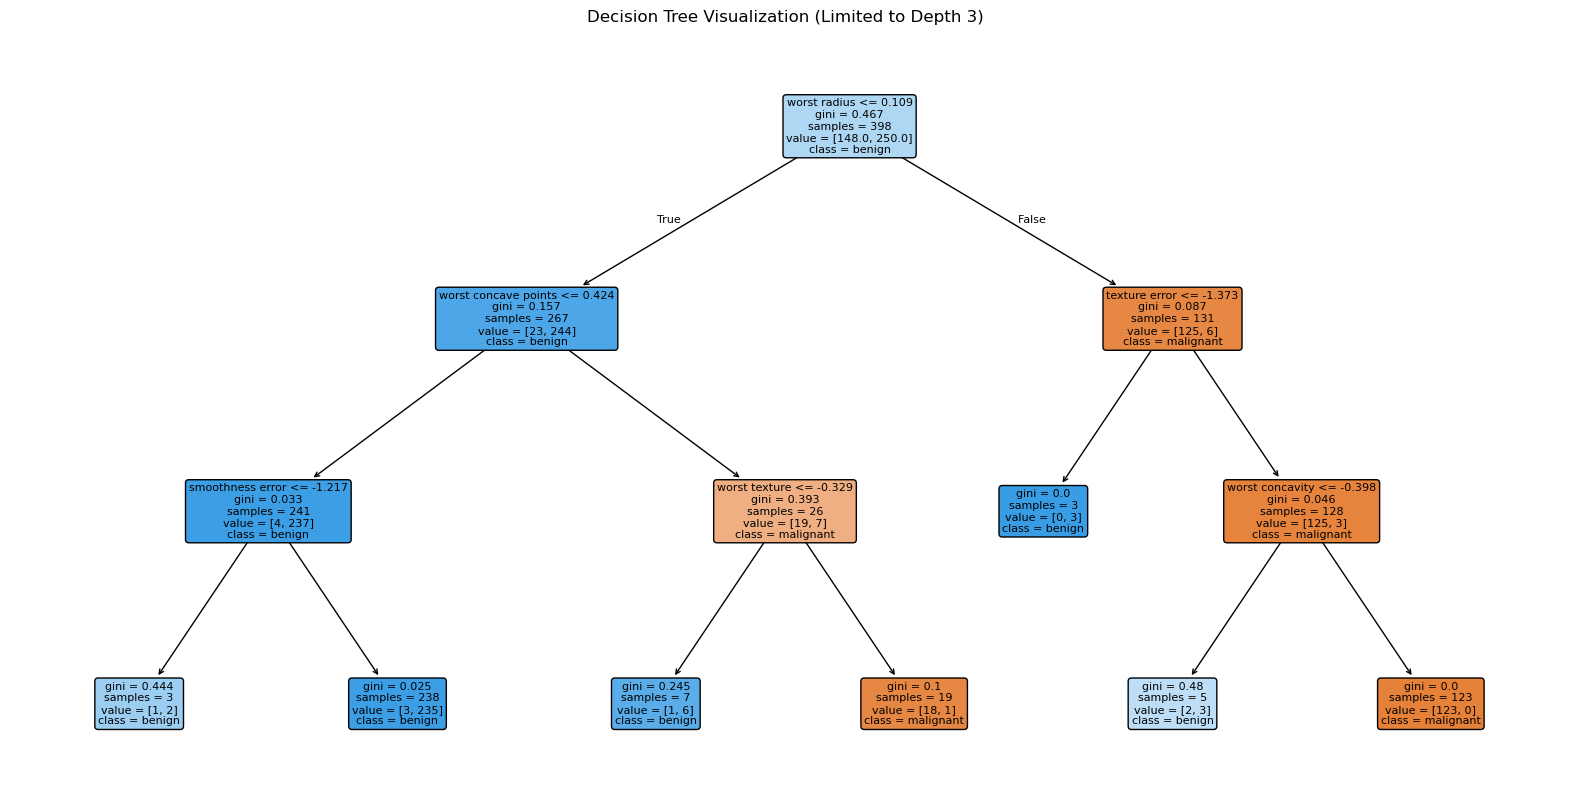

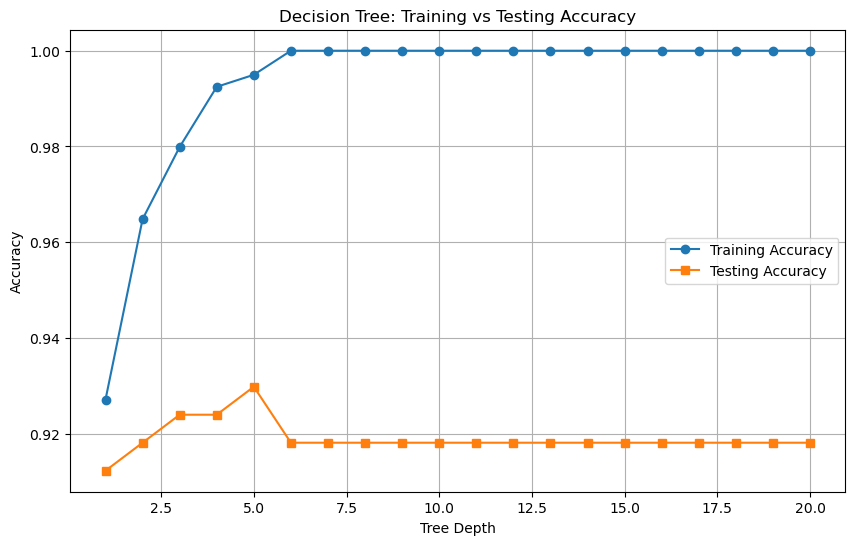


Optimal tree depth: 5
Accuracy at optimal depth: 0.9298

Optimized Model Classification Report:
              precision    recall  f1-score   support

   malignant       0.91      0.91      0.91        64
      benign       0.94      0.94      0.94       107

    accuracy                           0.93       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import tree


cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names = cancer.feature_names
target_names = cancer.target_names


cancer_df = pd.DataFrame(X, columns=feature_names)
cancer_df['target'] = y


print("Class distribution:")
print(cancer_df['target'].value_counts())
print(f"Benign (class 1): {np.sum(y == 1)}")
print(f"Malignant (class 0): {np.sum(y == 0)}")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)


y_pred = dt_classifier.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)


thresh = conf_matrix.max() / 2
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


feature_importance = dt_classifier.feature_importances_
indices = np.argsort(feature_importance)[::-1]


print("\nFeature ranking:")
for i in range(10): 
    print(f"{i+1}. {feature_names[indices[i]]} ({feature_importance[indices[i]]:.4f})")


plt.figure(figsize=(12, 8))
plt.bar(range(10), feature_importance[indices[:10]], align='center')
plt.xticks(range(10), [feature_names[i] for i in indices[:10]], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree Model')
plt.tight_layout()
plt.show()


plt.figure(figsize=(20, 10))
tree.plot_tree(DecisionTreeClassifier(max_depth=3, random_state=42).fit(X_train_scaled, y_train), 
               feature_names=feature_names, 
               class_names=target_names,
               filled=True, 
               rounded=True,
               fontsize=8)
plt.title('Decision Tree Visualization (Limited to Depth 3)')
plt.show()

dt_depths = range(1, 21)
train_accuracy = []
test_accuracy = []

for depth in dt_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train_scaled, y_train)
    
    train_accuracy.append(accuracy_score(y_train, dt.predict(X_train_scaled)))
    test_accuracy.append(accuracy_score(y_test, dt.predict(X_test_scaled)))


plt.figure(figsize=(10, 6))
plt.plot(dt_depths, train_accuracy, marker='o', linestyle='-', label='Training Accuracy')
plt.plot(dt_depths, test_accuracy, marker='s', linestyle='-', label='Testing Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Training vs Testing Accuracy')
plt.legend()
plt.grid(True)
plt.show()


optimal_depth = dt_depths[np.argmax(test_accuracy)]
print(f"\nOptimal tree depth: {optimal_depth}")
print(f"Accuracy at optimal depth: {max(test_accuracy):.4f}")


optimal_dt = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
optimal_dt.fit(X_train_scaled, y_train)
optimal_pred = optimal_dt.predict(X_test_scaled)

print("\nOptimized Model Classification Report:")
print(classification_report(y_test, optimal_pred, target_names=target_names))

**Section 3: Open-Ended Questions**

1. Differences between supervised, unsupervised, and reinforcement learning
Supervised Learning:

The algorithm learns from labeled training data
Goal: Learn a mapping from inputs to outputs
Example: Email spam detection where the model is trained on emails labeled as "spam" or "not spam." It learns to classify new emails based on features like sender, content, subject line, etc.

Unsupervised Learning:

The algorithm learns from unlabeled data
Goal: Find hidden patterns or intrinsic structures
Example: Customer segmentation where the algorithm identifies natural groupings of customers based on purchasing behavior, demographics, and interactions without predefined categories.

Reinforcement Learning:

The algorithm learns by interacting with an environment
Goal: Learn a policy to maximize cumulative rewards
Example: A self-driving car learning to navigate in traffic, where it receives positive rewards for safe driving and reaching destinations efficiently, and negative rewards for unsafe maneuvers or violations.

2. Concept of Transfer Learning
Transfer Learning is a machine learning technique where a model developed for one task is reused as the starting point for a model on a second task.
How it works:

Pre-train a model on a large dataset (e.g., ImageNet for image classification)
Take the pre-trained model and either:

Use it as a feature extractor by removing the output layer
Fine-tune the entire model or specific layers on the new task with a smaller dataset



Benefits for deep learning:

Reduced training data requirements: Can work well with much smaller datasets
Faster training time: Starting with pre-trained weights accelerates convergence
Better performance: Often achieves higher accuracy than training from scratch
Solves the insufficient data problem: Especially valuable for domains where labeled data is scarce
Enables edge applications: Models can be adapted for resource-constrained environments

Example: Using a model pre-trained on ImageNet to detect specific medical conditions in X-rays, requiring far fewer labeled medical images than training from scratch.

3. Ethical concerns surrounding AI/ML in bias and fairness
Key ethical concerns:

Data bias: ML models learn from historical data that may contain existing societal biases

Example: Resume screening systems trained on historical hiring decisions may perpetuate gender or racial biases present in past hiring practices


Algorithmic bias: Design choices in algorithms can amplify existing biases

Example: Facial recognition systems showing higher error rates for women and people with darker skin tones


Feedback loops: Systems that make decisions can create self-reinforcing biases

Example: Predictive policing algorithms that direct more officers to already over-policed areas, leading to more arrests and further "justifying" increased policing


Lack of transparency: Black-box models make it difficult to identify and address bias

Example: Loan approval systems where applicants can't understand why they were denied or how to improve their chances


Unequal impact: AI systems can disproportionately harm vulnerable populations

Example: Healthcare algorithms that use healthcare costs as a proxy for healthcare needs disadvantage populations with historically less access to care



Approaches to address these concerns:

Diverse and representative training data
Regular bias audits
Explainable AI techniques
Fairness metrics and constraints during model development
Diverse teams developing AI systems
Regulatory frameworks and oversight

4. Real-world application of AI/ML with significant impact
Application: AI in Healthcare Diagnostics (Medical Imaging)
Medical imaging AI, particularly for radiology, has had a transformative impact on healthcare by improving diagnostic accuracy, speed, and accessibility.
How it works:

Deep learning models (usually CNNs) are trained on vast datasets of medical images labeled by expert radiologists
The models learn to identify patterns associated with various conditions
When new images are input, the AI can detect abnormalities and classify potential diseases

Significant impacts:

Improved diagnostic accuracy: AI systems can detect subtle patterns that humans might miss
Reduced workload for radiologists: AI can pre-screen normal cases, allowing radiologists to focus on abnormal findings
Rural and underserved area access: Areas with radiologist shortages can utilize AI tools for initial screenings
Earlier disease detection: Particularly impactful for conditions like breast cancer, lung cancer, and diabetic retinopathy
Standardized care: Reduces variability in interpretations between different providers

Example implementation: Google's DeepMind developed an AI system for detecting diabetic retinopathy from retinal scans with accuracy comparable to expert ophthalmologists, enabling screening in regions with limited specialist access.

5. Advantages of ensemble methods in machine learning
Advantages of ensemble methods:

Improved accuracy: Combining multiple models typically performs better than any single model
Reduced overfitting: Ensembles average out the individual biases of models
Increased stability: Less variance in predictions across different datasets
Better handling of class imbalance: Especially for boosting methods
Captures complex relationships: Different models can capture different aspects of the data

When to use ensemble methods:

High-stakes applications: When prediction accuracy is critical (medical diagnosis, financial forecasting)
Complex datasets: When single models struggle to capture all relationships
Competition settings: When squeezing out extra performance is important
Noisy data: When dealing with datasets that contain errors or outliers
When you have computational resources: As ensembles require training multiple models

Types of ensemble methods:

Bagging (e.g., Random Forest): Best when base models have high variance/overfitting
Boosting (e.g., XGBoost, AdaBoost): Best when base models have high bias/underfitting
Stacking: Best when you have diverse model types that capture different aspects of the data

These ensemble methods have become the foundation of many winning solutions in data science competitions and real-world applications due to their robust performance across various domains.